In [2]:
#Bibliotecas
import pandas as pd 
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score 
import torch 
import torch.nn as nn

In [4]:
#Definindo as seeds e carregando o dataset
np.random.seed(123)
torch.manual_seed(123)

previsores = pd.read_csv('../datasets/breast_cancer/entradas_breast.csv')#dados das features
classe = pd.read_csv('../datasets/breast_cancer/saidas_breast.csv')#dados de saida

In [6]:
#Dividindo a base entre treinamento e teste
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size = 0.25)

In [7]:
#Transformando as features e a label em tensores
previsores_treinamento = torch.tensor(np.array(previsores_treinamento), dtype=torch.float)
classe_treinamento = torch.tensor(np.array(classe_treinamento), dtype = torch.float)
type(previsores_treinamento) , type(classe_treinamento)

(torch.Tensor, torch.Tensor)

In [9]:
#Criando o dataset de tensores
dataset = torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

In [10]:
#Construindo a rede
classificador = nn.Sequential(
    nn.Linear(in_features=30, out_features=16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
)
classificador.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [11]:
#Definindo a função de perda e o otimizador
criterion = nn.BCELoss() 
optimizer = torch.optim.Adam(classificador.parameters(), lr=0.001, weight_decay=0.0001)

In [12]:
#Treinando o modelo
for epoch in range(100):
  running_loss = 0.

  for data in train_loader:
    inputs, labels = data 
    #print(inputs)
    #print('-----')
    #print(labels)
    optimizer.zero_grad() 

    outputs = classificador(inputs)
    #print(outputs)
    loss = criterion(outputs, labels) 
    #print(loss)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  print('Época %3d: perda %.5f' % (epoch+1, running_loss/len(train_loader)))

Época   1: perda 10.78336
Época   2: perda 2.84862
Época   3: perda 1.67480
Época   4: perda 1.11414
Época   5: perda 0.63996
Época   6: perda 0.63753
Época   7: perda 0.58066
Época   8: perda 0.55460
Época   9: perda 0.55617
Época  10: perda 0.53322
Época  11: perda 0.55797
Época  12: perda 0.53816
Época  13: perda 0.52938
Época  14: perda 0.33227
Época  15: perda 0.51360
Época  16: perda 0.35532
Época  17: perda 0.49602
Época  18: perda 0.33208
Época  19: perda 0.29349
Época  20: perda 0.25046
Época  21: perda 0.29527
Época  22: perda 0.49888
Época  23: perda 0.47241
Época  24: perda 0.45883
Época  25: perda 0.27544
Época  26: perda 0.23399
Época  27: perda 0.26373
Época  28: perda 0.24136
Época  29: perda 0.28275
Época  30: perda 0.22633
Época  31: perda 0.19294
Época  32: perda 0.22258
Época  33: perda 0.20290
Época  34: perda 0.20888
Época  35: perda 0.20335
Época  36: perda 0.20316
Época  37: perda 0.18855
Época  38: perda 0.22316
Época  39: perda 0.23315
Época  40: perda 0.19261

In [13]:
#Avaliando o modelo
classificador.eval()
previsores_teste = torch.tensor(np.array(previsores_teste), dtype=torch.float)

In [15]:
previsoes = classificador.forward(previsores_teste)
previsoes

tensor([[9.9355e-01],
        [1.0000e+00],
        [2.9422e-01],
        [9.2651e-01],
        [8.3247e-05],
        [8.4928e-01],
        [9.5924e-01],
        [9.9991e-01],
        [6.6299e-01],
        [5.7436e-01],
        [7.9064e-01],
        [9.9799e-01],
        [5.4718e-01],
        [9.9517e-01],
        [9.9611e-01],
        [8.4850e-01],
        [9.9596e-01],
        [1.0000e+00],
        [3.0448e-01],
        [9.9696e-01],
        [2.6379e-10],
        [6.6197e-03],
        [5.5910e-01],
        [1.0000e+00],
        [9.0192e-01],
        [3.6462e-03],
        [8.0374e-01],
        [9.9998e-01],
        [9.0432e-05],
        [9.9757e-01],
        [4.8416e-01],
        [9.9999e-01],
        [9.3972e-01],
        [9.8572e-01],
        [3.5888e-01],
        [9.9732e-01],
        [5.8344e-01],
        [9.9820e-01],
        [9.9441e-01],
        [3.3886e-05],
        [4.6328e-03],
        [9.1988e-01],
        [5.5689e-08],
        [3.7427e-01],
        [5.1450e-05],
        [7

In [17]:
previsoes = np.array(previsoes > 0.5) 
previsoes

array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

In [18]:
taxa_acerto = accuracy_score(classe_teste, previsoes)
taxa_acerto

0.9020979020979021

In [19]:
matriz = confusion_matrix(classe_teste, previsoes)
matriz

array([[43, 11],
       [ 3, 86]], dtype=int64)

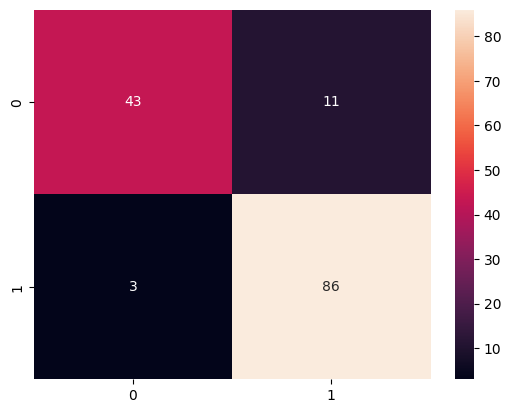

In [20]:
sns.heatmap(matriz, annot=True);